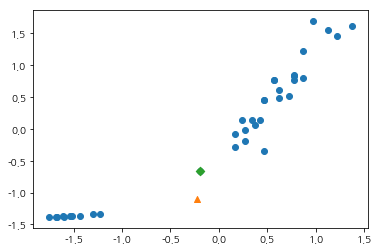

In [6]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

length = bream_length+smelt_length # 도미와 빙어의 길이데이터를 병합
weight = bream_weight+smelt_weight #도미와 빙어의 무게 데이터를 병합
fish_data=[]

fish_data = [[l,w] for l,w in zip(length,weight)] # 길이와 무게를 l,w에 하나씩 넣고, ㅣ,w를 리스트 형식으로 피쉬데이터에 붙인다.
fish_target = [1]*35 + [0]*14 # 도미데이터 35개의 데이터가 앞에 있기 때문에 1이 35를 먼저 넣고, 0인 빙어데이터 14개를 후열에 넣는다.


train_input,test_input,train_target,test_target = train_test_split(fish_data,fish_target, stratify = fish_target, random_state = 42)
# train데이터와 test데이터로 나눈다. 비율은 0.75 : 0.25 / stratify 란?  정당한 비율로 잘 섞였는지 확인하고 잘 안섞였으면 다시 섞는다.

mean  = np.mean(train_input,axis = 0) # 평균 axis = 0 은 열 , axis =1 은 행
std = np.std(train_input,axis = 0) #표준 편차

train_scaled = (train_input -mean) / std # Z스코어 구하기 Z스코어란 데이터가 평균에서 얼마나 많은 표준편차를 가지는지 알려준다.
new = ([25,100] - mean) /std # 판별할 새로운 데이터도 z스코어 형식으로 바꿔준다.

kn = KNeighborsClassifier(n_neighbors=1) # 최적 이므로  n_neighbors 하이퍼 파라미터를 1로 설정
kn.fit(train_scaled,train_target) # 모델 학습 train_target은 답이므로 z스코어를 해줄 필요가 없다.


distances, indexes = kn.kneighbors([new]) # 거리와 인덱스 반환.

plt.scatter(train_scaled[:,0], train_scaled[:,1]) #0번이 길이, 1번이 무게? 데이터 
plt.scatter(new[0], new[1],marker= '^') # 판별 데이터 그래프로 출력.

plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D') # 최적이웃 그래프로 출력.
plt.show()

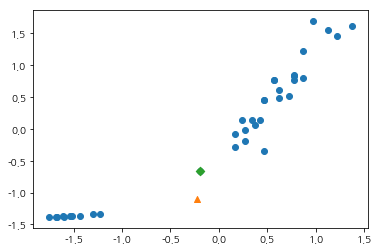

[[-0.19005591]] [[-0.65604058]]
[[21]]


In [5]:
kn = KNeighborsClassifier(n_neighbors=1, weights="distance", metric="euclidean") # 가중치를 거리기반으로 하이퍼 파라미터 설정한다.
kn.fit(train_scaled,train_target) #  // 그 외 동일.
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1],marker= '^')

plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D')
plt.show()
print(train_scaled[indexes, 0],train_scaled[indexes,1])
print(indexes)